In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 15

In [2]:
rs=19011539 ## Random_state fixed to reproducibility

## Loading Datas:

In [3]:
data_s1=pd.read_csv("garments_worker_productivity_s1.csv")
data_s2=pd.read_csv("garments_worker_productivity_s2.csv")

In [4]:
print(data_s1.columns)
data_s1.head()

Index(['Month', 'Day', 'Quarter', 'Department', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'wip_mean', 'wip_median', 'wip_knn', 'wip_rf'],
      dtype='object')


,Month,Day,Quarter,Department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean,wip_median,wip_knn,wip_rf
0,1,4,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1108.0,1108.0,1108.0,1108.0
1,1,4,1,2,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1190.0,1039.0,818.0,710.0
2,1,4,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,968.0,968.0,968.0,968.0
3,1,4,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,968.0,968.0,968.0,968.0
4,1,4,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1170.0,1170.0,1170.0,1170.0


In [5]:
print(data_s2.columns)
data_s2.head()

Index(['Month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'wip_mean', 'wip_median', 'wip_knn', 'wip_rf'],
      dtype='object')


,Month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,...,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,wip_mean,wip_median,wip_knn,wip_rf
0,1,1,0,0,0,0,0,1,0,0,...,98,0.0,0,0,59.0,0.940725,1108.0,1108.0,1108.0,1108.0
1,1,1,0,0,0,0,1,0,0,0,...,0,0.0,0,0,8.0,0.886500,1190.0,1039.0,818.0,782.0
2,1,1,0,0,0,0,0,1,0,0,...,50,0.0,0,0,30.5,0.800570,968.0,968.0,968.0,968.0
3,1,1,0,0,0,0,0,1,0,0,...,50,0.0,0,0,30.5,0.800570,968.0,968.0,968.0,968.0
4,1,1,0,0,0,0,0,1,0,0,...,50,0.0,0,0,56.0,0.800382,1170.0,1170.0,1170.0,1170.0


## Developing Random Forest algorithms to predict...

In [6]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
from sklearn.model_selection import GridSearchCV

In [7]:
def make_RF(strategy='s1',var='wip_knn',pr=True,plot2=False):
    # Labels are the values we want to predict
    if strategy=='s1':
        data=data_s1
        labels = np.array(data['actual_productivity'])# Remove the labels from the features
        features=data[['Month', 'Day', 'Quarter', 'Department', 'team', 'targeted_productivity', 'smv', 
                       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', var]]#
    if strategy=='s2':
        data=data_s2
        labels = np.array(data['actual_productivity'])# Remove the labels from the features
        features=data[['Month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 
                       'department_finishing', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 
                       'day_Tuesday', 'day_Wednesday', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 
                       'idle_men', 'no_of_style_change', 'no_of_workers', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)
    # Using Skicit-learn to split data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = rs)
    
    rf_param_grid = {
     'n_estimators':[100, 200, 400, 600, 800, 1000],
     'max_depth': [10, 15, 20, 25, 30]}
    
    rfm = RandomForestRegressor(random_state = rs)
    
    grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_rfe.fit(train_features, train_labels)
    best=grid_rfe.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
    
    # max_features={"auto", "sqrt", "log2"}
    rf = RandomForestRegressor(**best,random_state = rs)#(n_estimators = ne, random_state = rs,max_features="auto")
    # Train the model on training data
    rf.fit(train_features, train_labels)
    # Use the forest's predict method on the test data
    predictions = rf.predict(features)
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = rf.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF, strategy="+strategy+")", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.grid()
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'max_depth': 15, 'n_estimators': 400}
Lowest RMSE found:  0.11959072323224675
Mean Absolute Error (MAE): 0.0365
Mean Square Error (MSE): 0.004
Root Mean Square Error (RMSE): 0.0629
Mean Absolute Percentage Error (MAPE): 6.3009
Accuracy: 93.7 %.
Correlation coeficient: 0.94


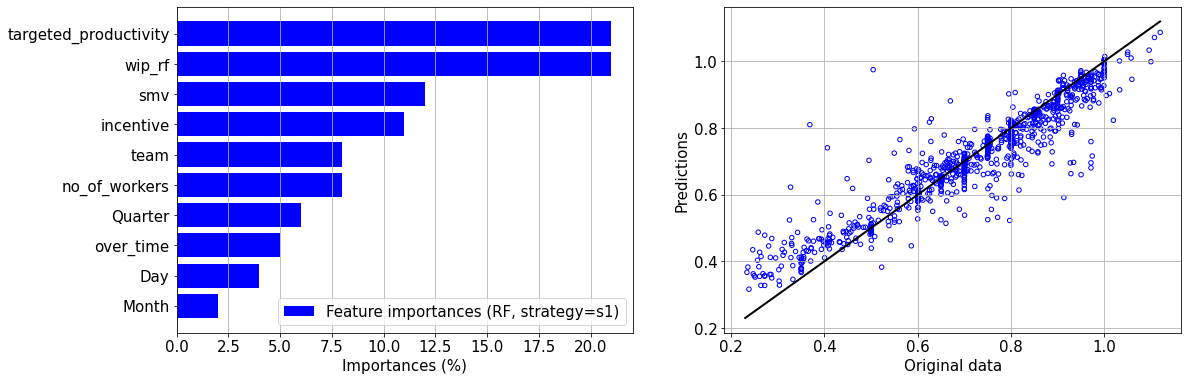

In [8]:
a1_s1=make_RF('s1','wip_rf',True,True)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'max_depth': 15, 'n_estimators': 600}
Lowest RMSE found:  0.12129262334769753
Mean Absolute Error (MAE): 0.0369
Mean Square Error (MSE): 0.004
Root Mean Square Error (RMSE): 0.0635
Mean Absolute Percentage Error (MAPE): 6.4349
Accuracy: 93.57 %.
Correlation coeficient: 0.94


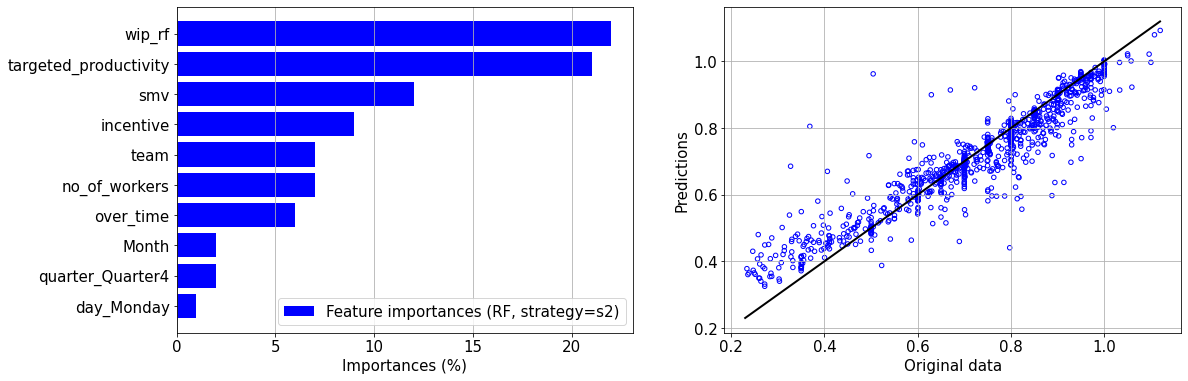

In [9]:
a1_s2=make_RF('s2','wip_rf',True,True)

## Developing GradientBoosting Regressor to predict...

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [11]:
def make_XGB(strategy='s1',var='wip_knn',pr=True,plot2=False):
    # Labels are the values we want to predict
    if strategy=='s1':
        data=data_s1
        labels = np.array(data['actual_productivity'])# Remove the labels from the features
        features=data[['Month', 'Day', 'Quarter', 'Department', 'team', 'targeted_productivity', 'smv', 
                       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', var]]#
    if strategy=='s2':
        data=data_s2
        labels = np.array(data['actual_productivity'])# Remove the labels from the features
        features=data[['Month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 
                       'department_finishing', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 
                       'day_Tuesday', 'day_Wednesday', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 
                       'idle_men', 'no_of_style_change', 'no_of_workers', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=rs, test_size=0.25)
    
    gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 400, 600, 1000],
     'max_depth': [10, 15, 20, 25, 30],
#    'learning_rate': [0.1,0.01,0.001]
    }
    
    gbm = xgb.XGBRegressor(random_state = rs)
    
    grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_mse.fit(X_train, y_train)
    best=grid_mse.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    
    gbm = xgb.XGBRegressor(**best,random_state = rs)
    gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(features)
    print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(labels, predictions)), 2)))
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = gbm.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (XGB, strategy="+strategy+")", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.grid()
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.6, 'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.1222037270839394
Root mean square error for test dataset: 0.05
Mean Absolute Error (MAE): 0.0174
Mean Square Error (MSE): 0.0025
Root Mean Square Error (RMSE): 0.0497
Mean Absolute Percentage Error (MAPE): 2.6602
Accuracy: 97.34 %.
Correlation coeficient: 0.96


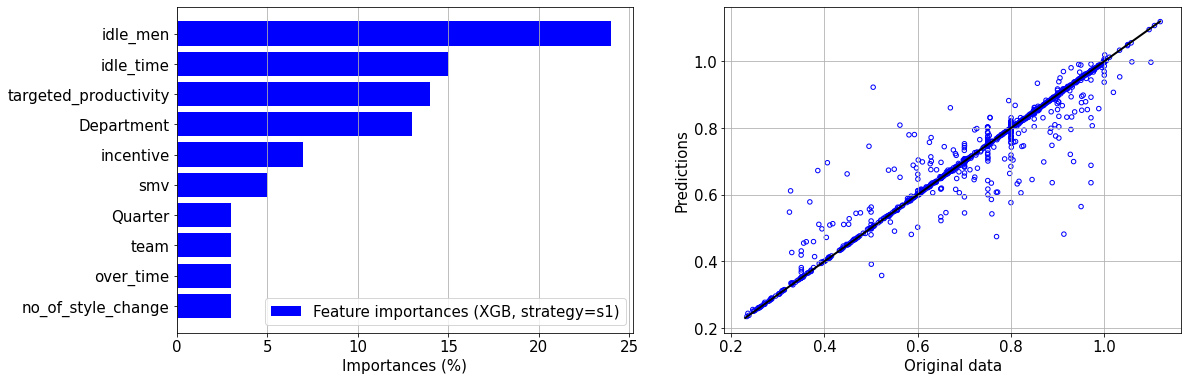

In [12]:
b1_s1=make_XGB('s1','wip_rf',True,True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.12183995589533282
Root mean square error for test dataset: 0.05
Mean Absolute Error (MAE): 0.0176
Mean Square Error (MSE): 0.0029
Root Mean Square Error (RMSE): 0.0534
Mean Absolute Percentage Error (MAPE): 2.7207
Accuracy: 97.28 %.
Correlation coeficient: 0.95


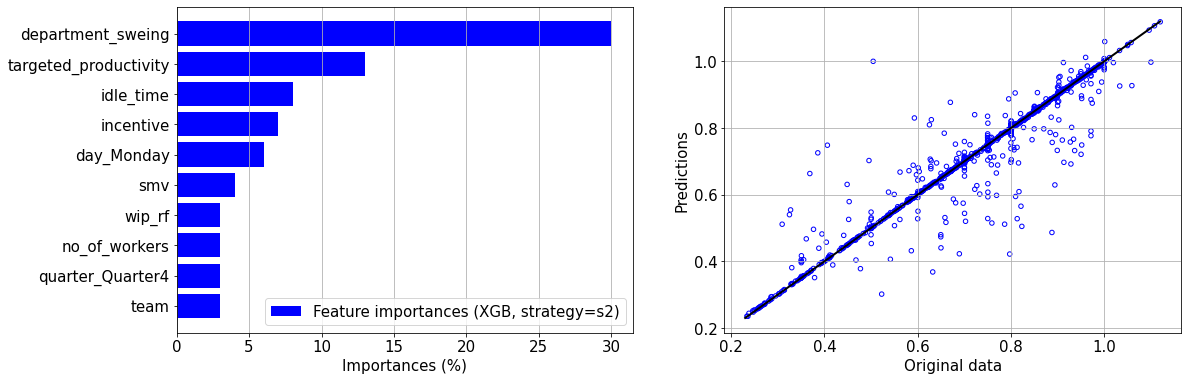

In [13]:
b1_s2=make_XGB('s2','wip_rf',True,True)

In [14]:
def make_GB(strategy='s1',var='wip_knn',pr=True,plot2=False):
    # Labels are the values we want to predict
    if strategy=='s1':
        data=data_s1
        labels = np.array(data['actual_productivity'])# Remove the labels from the features
        features=data[['Month', 'Day', 'Quarter', 'Department', 'team', 'targeted_productivity', 'smv', 
                       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', var]]#
    if strategy=='s2':
        data=data_s2
        labels = np.array(data['actual_productivity'])# Remove the labels from the features
        features=data[['Month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 
                       'department_finishing', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 
                       'day_Tuesday', 'day_Wednesday', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 
                       'idle_men', 'no_of_style_change', 'no_of_workers', var]]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=rs, test_size=0.25)
    
    gbm_param_grid = {
     #'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 400, 600, 1000],
     'max_depth': [10, 15, 20, 25, 30],
#    'learning_rate': [0.1,0.01,0.001]
    }
    
    gbm = GradientBoostingRegressor(random_state = rs)
    
    grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
    
    grid_mse.fit(X_train, y_train)
    best=grid_mse.best_params_
    print("Best parameters found: ",best)
    print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
    
    gbm = xgb.XGBRegressor(**best,random_state = rs)
    gbm.fit(X_train, y_train)
    
    predictions = gbm.predict(features)
    print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(labels, predictions)), 2)))
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = gbm.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Correlation coeficient:', round(corrcoef, 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (GB, strategy="+strategy+")", color="b")
        plt.xlabel("Importances (%)",fontsize=15)
        plt.grid(axis='x')
        plt.legend(ncol=2, loc="lower right", frameon=True)
        plt.subplot(122)
        plt.scatter(labels,predictions,color='b',s=20,marker='o', facecolors='none')
        plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15)
        plt.ylabel("Predictions",fontsize=15)
        plt.grid()
        plt.show()
    return predictions,feature_importances#rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.14453297671527365
Root mean square error for test dataset: 0.06
Mean Absolute Error (MAE): 0.0182
Mean Square Error (MSE): 0.0031
Root Mean Square Error (RMSE): 0.0559
Mean Absolute Percentage Error (MAPE): 2.7565
Accuracy: 97.24 %.
Correlation coeficient: 0.95


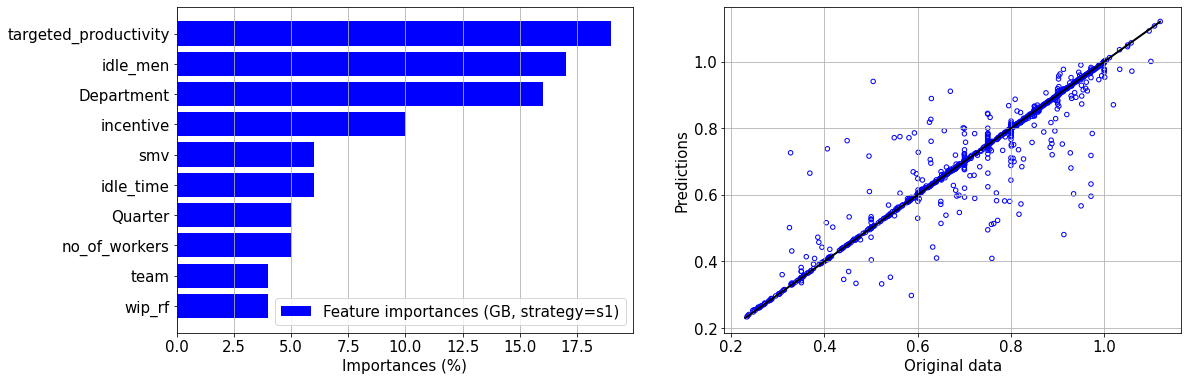

In [15]:
c1_s1=make_GB('s1','wip_rf',True,True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 10, 'n_estimators': 100}
Lowest RMSE found:  0.14217279884364215
Root mean square error for test dataset: 0.06
Mean Absolute Error (MAE): 0.019
Mean Square Error (MSE): 0.0034
Root Mean Square Error (RMSE): 0.0586
Mean Absolute Percentage Error (MAPE): 2.8508
Accuracy: 97.15 %.
Correlation coeficient: 0.94


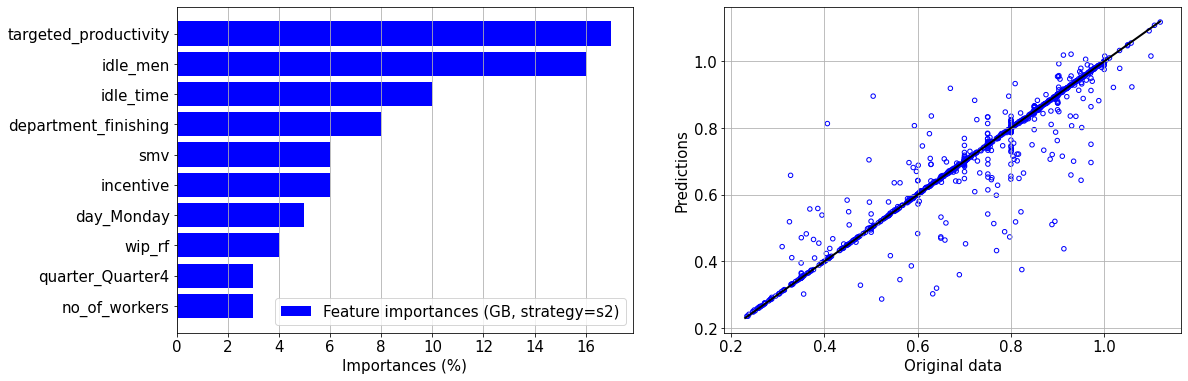

In [16]:
c1_s2=make_GB('s2','wip_rf',True,True)

In [17]:
predictions_results=pd.DataFrame(np.array([a1_s1[0],a1_s2[0],b1_s1[0],b1_s2[0],c1_s1[0],c1_s2[0],data_s1["actual_productivity"]]).T,
                                 columns=["RF_s1","RF_s2","XGB_s1","XGB_s2","GB_s1","GB_s2","Original"])

In [18]:
predictions_results

,RF_s1,RF_s2,XGB_s1,XGB_s2,GB_s1,GB_s2,Original
0,0.942355,0.944640,0.939939,0.940932,0.940002,0.941001,0.940725
1,0.869197,0.871249,0.887640,0.886199,0.885790,0.884392,0.886500
2,0.800409,0.800772,0.803968,0.800896,0.803496,0.800582,0.800570
3,0.800404,0.800771,0.797632,0.797900,0.799319,0.800582,0.800570
4,0.800060,0.801640,0.801312,0.801712,0.799938,0.801680,0.800382
...,...,...,...,...,...,...,...
1192,0.759942,0.561397,0.713652,0.678052,0.826859,0.641462,0.628333
1193,0.613054,0.610283,0.625988,0.626712,0.625632,0.625677,0.625625
1194,0.603144,0.604088,0.624521,0.624535,0.625252,0.625775,0.625625
1195,0.556301,0.567586,0.505006,0.506300,0.505833,0.506653,0.505889


In [19]:
predictions_results.to_csv("predictions_results.csv",index=False)

In [20]:
a1_s1[1].to_csv("features_importances_RF_s1.csv",index=False)
a1_s2[1].to_csv("features_importances_RF_s2.csv",index=False)
b1_s1[1].to_csv("features_importances_XGB_s1.csv",index=False)
b1_s2[1].to_csv("features_importances_XGB_s2.csv",index=False)
c1_s1[1].to_csv("features_importances_GB_s1.csv",index=False)
c1_s2[1].to_csv("features_importances_GB_s2.csv",index=False)